># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
> ##  <font color="green">In Lab Task # 04</font>
> ###  <font color="black">Group # 02</font>

🧪 Lab Exercise: Linear Regression; you dataset reflect real-world unclean data for health sector.

* * *

*Dataset*: [Generated hospital pattern data](https://drive.google.com/file/d/1EV3S9CL2IBLT53N3EjKWxctLnu3L5Dgh/view?usp=drive_link)

* * *
📊 Dataset Columns

| Column                  | Description                                           |
| :---------------------- | :---------------------------------------------------- |
| Age                     | Patient age (18–90)                                   |
| BMI                     | Body Mass Index              |
| Blood_Pressure          | Systolic blood pressure            |
| Cholesterol             | Cholesterol level            |
| Smoking_Status          | Categorical: Never / Former / Current                 |
| Physical_Activity_Level | Categorical: Low / Moderate / High                    |
| Glucose                 | Blood glucose             |
| Heart_Rate              | Beats per minute                                      |
| Risk_Score              | Computed health risk indicator  |

---


Q.01 Import the necessary libraries and load your dataset.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Q.02 Display the top 10 rows of the dataset

In [64]:
data= pd.read_csv("health_dataset.csv")
print(data.head(10))

         Age        BMI  Blood_Pressure  Cholesterol Smoking_Status  \
0  57.450712  19.434696      148.523551   173.070670          Never   
1  47.926035        NaN      168.188333   155.932616          Never   
2  59.715328  39.732937      102.028649   170.965070         Former   
3  72.845448  33.194792      141.259385   252.145672         Former   
4  46.487699  17.883780      116.987149   172.024044          Never   
5  46.487946  24.094596      120.257492   315.295283        Current   
6  73.688192  34.601467      118.152122   229.732716          Never   
7  61.511521  22.753983      112.720185   217.393445         Former   
8  42.957884  29.662917      130.970433   175.665689         Former   
9  58.138401  31.647804      113.380998   238.012395        Current   

  Physical_Activity_Level     Glucose  Heart_Rate  Risk_Score  
0                    High  100.866961   64.376065   59.886022  
1                Moderate  114.617008   79.283071  101.278737  
2                     Low 

Q.03 What are the dimensions of data?

In [65]:
print(data.shape)

(250, 9)


Q.04 use describe method to familiarize yourself with data.

In [66]:
print(data.describe)

<bound method NDFrame.describe of            Age        BMI  Blood_Pressure  Cholesterol Smoking_Status  \
0    57.450712  19.434696      148.523551   173.070670          Never   
1    47.926035        NaN      168.188333   155.932616          Never   
2    59.715328  39.732937      102.028649   170.965070         Former   
3    72.845448  33.194792      141.259385   252.145672         Former   
4    46.487699  17.883780      116.987149   172.024044          Never   
..         ...        ...             ...          ...            ...   
245  44.982481  30.233460      115.485124   198.755988          Never   
246  42.875820  20.776523      133.735335   281.907461         Former   
247  40.200062  25.857968      114.892341   235.633714          Never   
248  76.481814  21.746290      117.769644   187.152840        Current   
249  56.074726  18.703202      101.866778   232.903311          Never   

    Physical_Activity_Level     Glucose  Heart_Rate  Risk_Score  
0                      

Q.05 Does the dataset contain missing values? report how many values are missing of each column.

In [67]:
print(data.isnull().sum())

Age                         0
BMI                        12
Blood_Pressure              0
Cholesterol                12
Smoking_Status              0
Physical_Activity_Level     0
Glucose                    12
Heart_Rate                  0
Risk_Score                  0
dtype: int64


Q.06 do we have outlier(s) in the columns
- Blood_Pressure
- Heat_Rate

*hint: use box plot

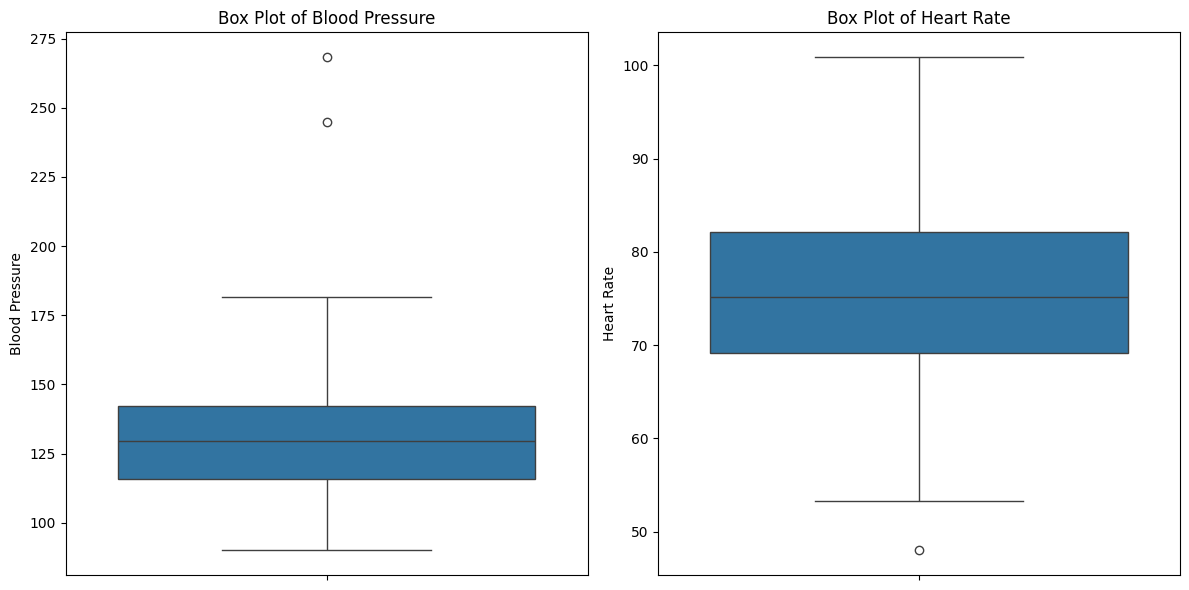

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=data['Blood_Pressure'], ax=axes[0])
axes[0].set_title('Box Plot of Blood Pressure')
axes[0].set_ylabel('Blood Pressure')

sns.boxplot(y=data['Heart_Rate'], ax=axes[1])
axes[1].set_title('Box Plot of Heart Rate')
axes[1].set_ylabel('Heart Rate')

plt.tight_layout()
plt.show()

Q.07 Handle missing values using:
- Mean for numerical columns
- Mode for categorical columns

In [69]:
num_cols  = data.select_dtypes(include=['number']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
Age                        0
BMI                        0
Blood_Pressure             0
Cholesterol                0
Smoking_Status             0
Physical_Activity_Level    0
Glucose                    0
Heart_Rate                 0
Risk_Score                 0
dtype: int64


Q.08 Convert Categorical Feature(s) to numercial values (One-hot encoding)
- Smoking_Status
- Physical_Activity_Level

In [75]:
data["Physical_Activity_Level"]=data["Physical_Activity_Level"].replace({"High":3,"Moderate":2,"Low":1})
data["Smoking_Status"]=data["Smoking_Status"].replace({"Former":3,"Current":2,"Never":1})
print(data["Physical_Activity_Level"].head(10))
print(data["Smoking_Status"].head(10))

0    3
1    2
2    1
3    2
4    3
5    2
6    3
7    3
8    1
9    1
Name: Physical_Activity_Level, dtype: int64
0    1
1    1
2    3
3    3
4    1
5    2
6    1
7    3
8    3
9    2
Name: Smoking_Status, dtype: int64





---

Q.09 Provide a correlation plot for the variables in the dataset,
- comment on the strength on the predictors.
- comment on the correlations between predictors.

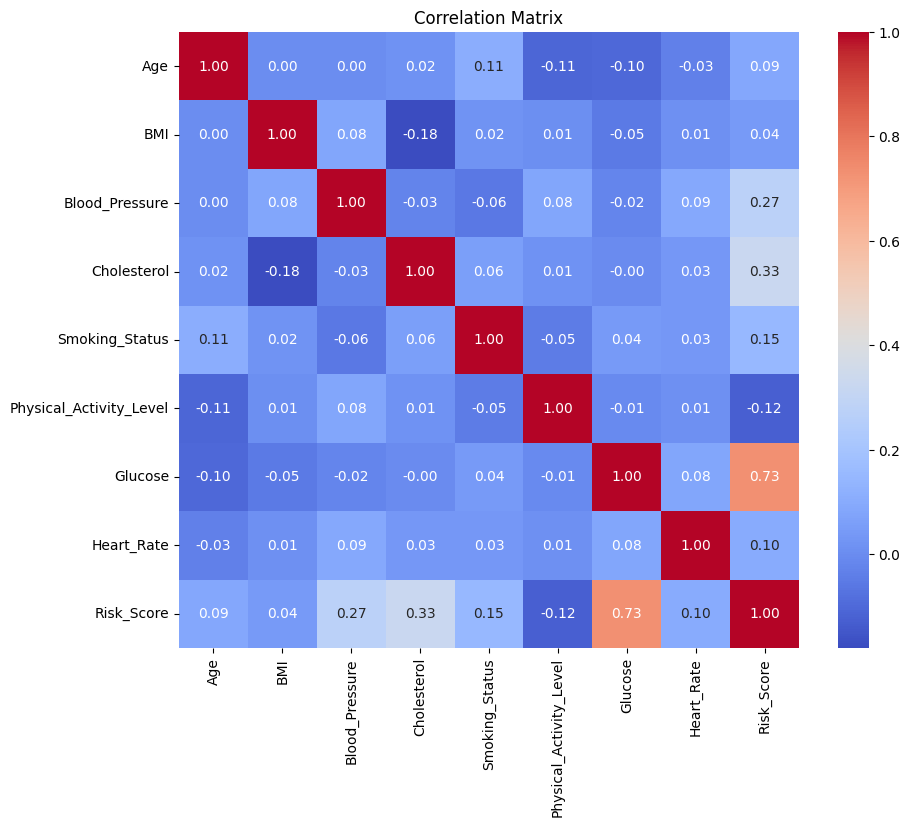

In [71]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Q. 10
- Add a constant column to the dataset.
- Determine which independent variable is the most related with the dependent variable by developing a linear regression model between the dependent variable and each independent variable (include the const column as well).
- Rank the predictors according to the Adjusted R2 values of the linear models obtained.
- Predict for *Risk_Score*

In [74]:
data = sm.add_constant(data)

dependent_variable = 'Risk_Score'
independent_variables = data.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables.remove('const')

results = []
models = {}

for iv in independent_variables:
    X = data[['const', iv]]
    y = data[dependent_variable]
    model = sm.OLS(y, X).fit()
    results.append({'Predictor': iv, 'Adjusted_R2': model.rsquared_adj})
    models[iv] = model

rank_df = pd.DataFrame(results)
rank_df = rank_df.sort_values(by='Adjusted_R2', ascending=False)

print("Predictors ranked by Adjusted R-squared:")
display(rank_df)

best_predictor = rank_df.iloc[0]['Predictor']
best_model = models[best_predictor]

sample_data = pd.DataFrame({'const': [1], best_predictor: [data[best_predictor].mean()]})
predicted_risk_score = best_model.predict(sample_data)

print(f"\nPredicting Risk_Score using the best predictor ({best_predictor}):")
print(f"Sample input ({best_predictor} mean): {data[best_predictor].mean()}")
print(f"Predicted Risk_Score: {predicted_risk_score[0]}")

Predictors ranked by Adjusted R-squared:


,Predictor,Adjusted_R2
6,Glucose,0.534226
3,Cholesterol,0.103014
2,Blood_Pressure,0.071677
4,Smoking_Status,0.018146
5,Physical_Activity_Level,0.011528
7,Heart_Rate,0.006177
0,Age,0.003346
1,BMI,-0.002014



Predicting Risk_Score using the best predictor (Glucose):
Sample input (Glucose mean): 112.59968661296934
Predicted Risk_Score: 110.65092257690682


Q11. Comute a linear regression model for dependent variable Risk_Score using all independent variables and report the Adjusted R2 values.

In [73]:
dependent_variable = 'Risk_Score'
independent_variables = data.columns.tolist()
independent_variables.remove(dependent_variable)

X = data[independent_variables]
y = data[dependent_variable]

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Risk_Score   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     120.0
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.42e-79
Time:                        15:05:07   Log-Likelihood:                -1132.2
No. Observations:                 250   AIC:                             2282.
Df Residuals:                     241   BIC:                             2314.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -